We would like to know which "kinds" of players are most likely to contribute a large amount of data. Thus, our question will be, what variables contribute to the demographic of players that have high play times in Minecraft?
First, we wll load in players.csv. The data will be assigned as "players_data."

In [7]:
library(tidyverse)
library(scales)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [3]:
players_data <- read_csv("data/players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In players_data, there contains 196 total observations. Out of all the variables, the ones that can predict the demographic of a person that plays a lot of Minecraft are experience, played_hours, gender and age. The columns email, subscribe and name will be left out as these do not contribute to the demographic.
- The experience variable is categorical and contains 5 possible values: "Beginner", "Amateur", "Regular", "Pro" and "Veteran". These placeholders describe the level of skill and experience each player has rated themselves from least to most experienced.
- The played_hours variable is numeric and up to 1 decimal place. This variable, quantified in hours, was determined through how long each player played Minecraft in one sitting. This variable will be the response variable.
- The gender variable is categorical and contains 7 options: "Male", "Female", "Non-binary", "Prefer not to say", "Agender", "Two-spirited" and "Other." 
- The age variable is numeric and contains integer values.
  
A potential issue is that the gender variable contains the "Prefer not to say" and "Other" option. As this data is vague and will not aide in the gender demographic relationship, it will not be considered. Another similar issue for the "Age" variable; observations with "NA" in its "Age" variable will also not be considered. A more pressing issue, is that this data contains some outliers in the played_hours variable. Some players have claimed to play over 200 hours of Minecraft in a single session. These points may affect the regression model in predictions.
This data was collected by a Computer Science research group at UBC led by Frank Wood. The method in which they collected data, was recording players' actions thoughout the world in their Minecraft servers.

Now in players_data, "Prefer not to say" and "Other" in the gender variable along with "NA" in the age variable will be filtered out. Then the mean value for the 2 quantitative variables (Age and played_hours) will be computed.

In [31]:
filtered_players <- players_data |>
    filter(gender != "Prefer not to say") |>
    filter(gender != "Other") |>
    filter(Age != "NA") |>
    select(experience, played_hours, gender, Age)
filtered_players

experience,played_hours,gender,Age
<chr>,<dbl>,<chr>,<dbl>
Pro,30.3,Male,9
Veteran,3.8,Male,17
Veteran,0.0,Male,17
Amateur,0.7,Female,21
Regular,0.1,Male,21
Amateur,0.0,Female,17
Regular,0.0,Female,19
Amateur,0.0,Male,21
Amateur,0.1,Male,47


In [29]:
mean_quant <- filtered_players |>
    summarise(mean_age = mean(Age), mean_time = mean(played_hours)) |>
    round(2) |>
    select(mean_age, mean_time)

mean_quant

mean_age,mean_time
<dbl>,<dbl>
20.91,6.24


The mean age value is 20.91 years old and the mean_time played is 6.24 hours.

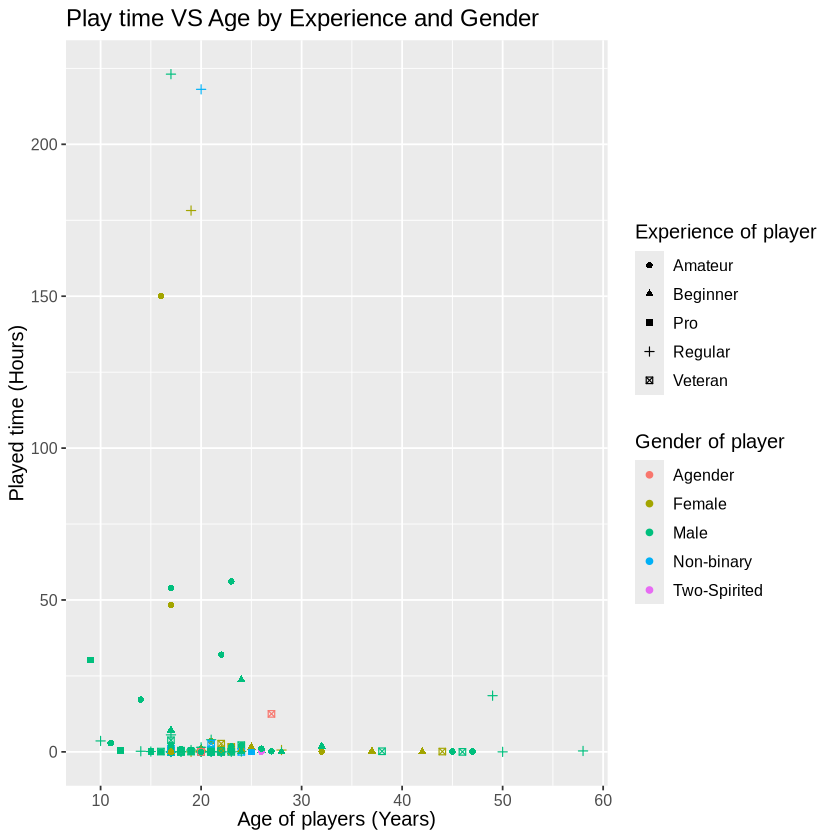

In [26]:

player_scatter <- filtered_players |>
    ggplot(aes(x = Age, y = played_hours, colour = gender, shape = experience)) +
    geom_point() +
    labs(x = "Age of players (Years)", y = "Played time (Hours)", colour = "Gender of player", shape = "Experience of player") +
    ggtitle("Play time VS Age by Experience and Gender") +
    theme(text = element_text(size = 12)) 
player_scatter

The distribution is male dominant, with play time at its highest between ages 10-30 and the experience distribution appearing to be random.

To see the distributions closer, we can examine the variables with bar graphs.

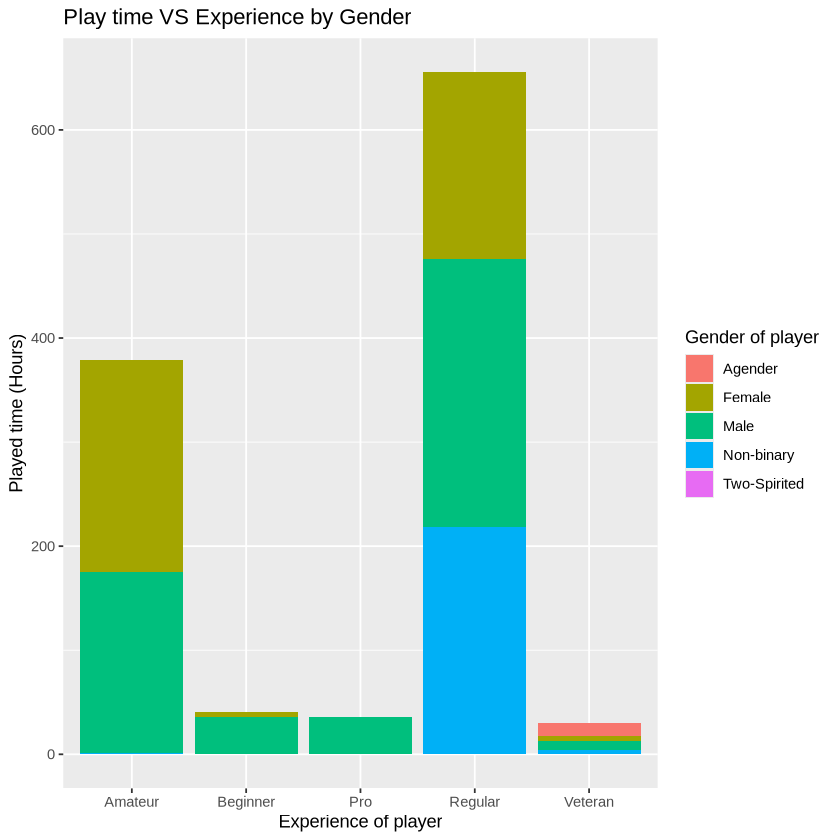

In [29]:
player_bar <- filtered_players |>
    ggplot(aes(x = experience, y = played_hours, fill = gender)) + 
    geom_bar(stat = "identity") +
    labs(x = "Experience of player", y = "Played time (Hours)", fill = "Gender of player") +
    ggtitle("Play time VS Experience by Gender")
player_bar

Stated above, most of the points in the scatter plot show green, or male. This bar graph shows despite having less female and non-binary players, they contribute a signifant portion to the play time, specifically females contributing more than males.

- To answer our question, KNN regression will be the selected modeling method. As with 5 variables, it is unknown if the relationship will be linear. On top of that, 3 of the variables are categorical, thus cannot perform linear regression. Therefore, KNN will be the better option at showcasing the relationship.
- With KNN regression, we must assume that there is no underlying relationship between the variables. We must also assume that the data used is representative of all demographics, so that predictions beyond testing data will be accurate. 
- Potential weaknesses with KNN regression are that the correlation and relationship between the variables will not be shown as well as with linear regression and that outliers discussed previously will distort the relationship.
- I will split the data 0.75 to 0.25 for training and testing data respectively. This split will occur at the start. Then I will perform cross validation with 5 validation sets with the vfold function to find the K value of lowest RMSE with the 0.75 training data. From here the models will be compared and selected for highest accuracy.